In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from scipy.stats import normaltest
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv('diamonds.csv',usecols = ['carat', 'cut', 'color', 'clarity', 'depth', 'table','price', 'x', 'y', 'z'])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## EDA

In [3]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [6]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
df['cut'].value_counts().to_dict()
df['cut'].replace({'Ideal': 4,'Premium': 3,'Very Good': 2,'Good': 1,'Fair': 0},inplace = True)

In [8]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [9]:
df = pd.get_dummies(df,columns = ['color'])
df.head()

,carat,cut,clarity,depth,table,price,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,4,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,3,SI1,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,1,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,3,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,1,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1


In [10]:
df['clarity'].value_counts().to_dict()
df['clarity'].replace({'SI1': 0,'VS2': 1,'SI2': 2,'VS1': 3,'VVS2': 4,'VVS1': 5,'IF':6,'I1':7},inplace = True)

In [11]:
df.head()

,carat,cut,clarity,depth,table,price,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,4,2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,3,0,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,1,3,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,3,1,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,1,2,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1


In [14]:
df.drop(['table','depth'],inplace = True,axis = 1)

In [15]:
indep = df[['carat','x','y','z']]

## Detecting Outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


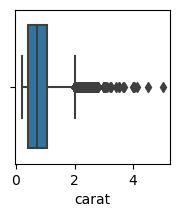

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


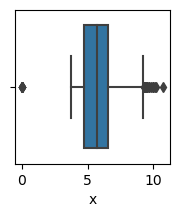

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


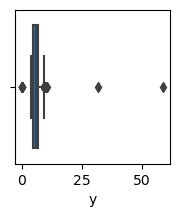

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


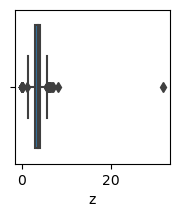

In [16]:
for i in indep.columns:
    plt.figure(figsize = (2,2))
    sns.boxplot(df[i])
    plt.show()

## Treating Outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


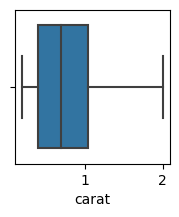

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


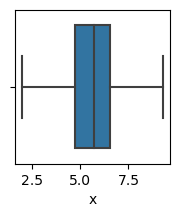

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


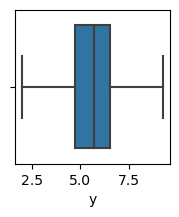

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


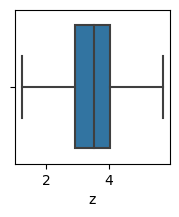

In [17]:
for i in indep.columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    
    lt = q1 - 1.5*iqr
    ut = q3 + 1.5*iqr
    df.loc[df[i]<lt,i] = lt
    df.loc[df[i]>ut,i] = ut
    
    plt.figure(figsize = (2,2))
    sns.boxplot(df[i])
    plt.show()
    
    

## Linear Regression

## 1. Linearity

In [18]:
df.corr()[5:6]

,carat,cut,clarity,price,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
y,0.981132,-0.12525,-0.181783,0.88728,0.998362,1.0,0.987852,-0.106311,-0.134128,-0.047295,-0.024422,0.094307,0.147003,0.165154


## 2.independence

<AxesSubplot:>

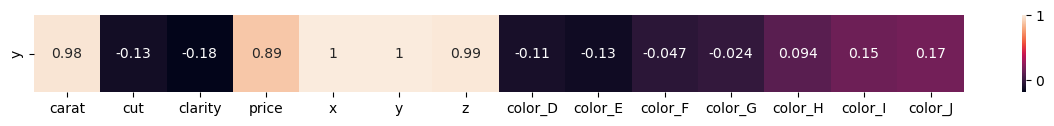

In [19]:
plt.figure(figsize = (15,1))
sns.heatmap(df.corr()[5:6],annot = True)

In [23]:
df

,carat,cut,clarity,price,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,4,2,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,3,0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,1,3,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,3,1,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,1,2,335,4.34,4.35,2.75,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,0,2757,5.75,5.76,3.50,1,0,0,0,0,0,0
53936,0.72,1,0,2757,5.69,5.75,3.61,1,0,0,0,0,0,0
53937,0.70,2,0,2757,5.66,5.68,3.56,1,0,0,0,0,0,0
53938,0.86,3,2,2757,6.15,6.12,3.74,0,0,0,0,1,0,0


## 3. No multicollinearity

In [20]:
df1 = df.drop('price',axis = 1)
for i in range(len(df1.columns)):
    vif = variance_inflation_factor(df,i)
    print(f"VIF of {df1.columns[i]} = {vif}")

VIF of carat = 53.79747446069712
VIF of cut = 1.1003723104446754
VIF of clarity = 1.1030548489352823
VIF of x = 9.033373263502138
VIF of y = 339.5808891513186
VIF of z = 316.40533265522913
VIF of color_D = 48.40388351974422
VIF of color_E = 50.02826712276856
VIF of color_F = 71.72174153437429
VIF of color_G = 70.72439778980541
VIF of color_H = 83.19623324471057
VIF of color_I = 60.2667480820643
VIF of color_J = 39.298196554066415


## Model Training

In [24]:
x1 = df.drop('price',axis = 1)
y1 = df['price']

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,random_state = 15,test_size = 0.3)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((37758, 13), (16182, 13), (37758,), (16182,))

In [27]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred = model.predict(x_test)

In [29]:
residual = y_test-y_pred

<AxesSubplot:xlabel='price', ylabel='Density'>

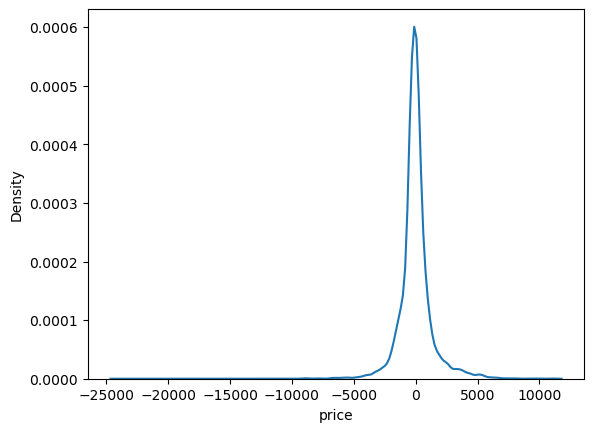

In [30]:
sns.kdeplot(residual)

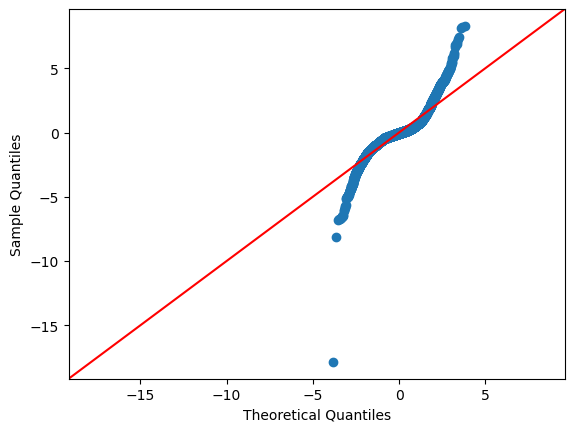

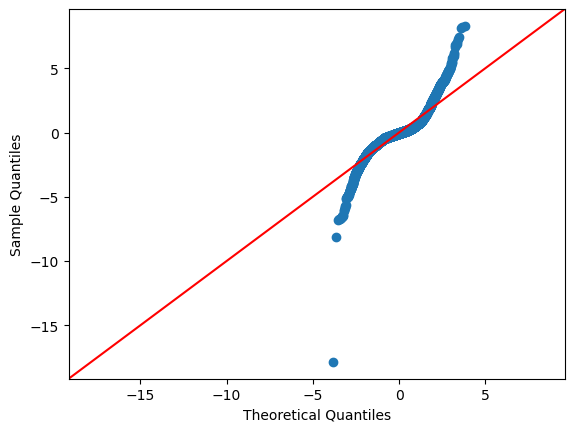

In [31]:
sm.qqplot(residual,stats.norm,fit = True,line = '45')

In [32]:
stats,p_value = normaltest(residual)
if p_value>0.05:
    print(f"p_value = {p_value}")
    print(f"Residuals are normally distributed")
    
else :
    print(f"p_value = {p_value}")
    print(f"Residuals are not normally distributed")

p_value = 0.0
Residuals are not normally distributed


## 5. Homoschedasticity

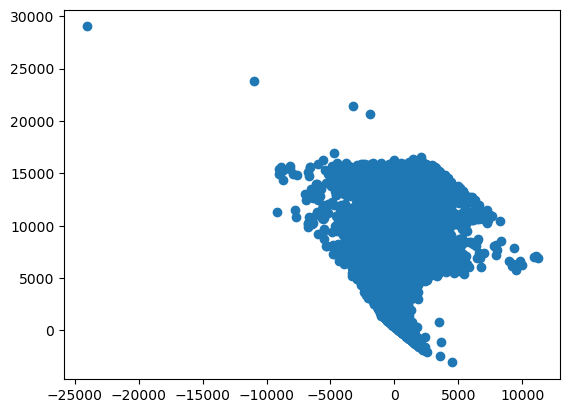

In [33]:
plt.scatter(residual,y_pred)

## Model Evaluation

In [34]:
def model_eval(x,y,model):
    y_pred = model.predict(x)
    
    residual = y - y_pred
    mse = mean_squared_error(y,y_pred)
    print(f"mse = {mse}")
    rmse = np.sqrt(mse)
    print(f"rmse ={rmse}")
    mae = mean_absolute_error(y,y_pred)
    print(f"mae = {mae}")

    r2 = r2_score(y,y_pred)
    print(f"r2_score = {r2}")
    return 

In [35]:
model_eval(x_test,y_test,model)

mse = 1822491.7857861076
rmse =1349.9969576951303
mae = 820.5042723973407
r2_score = 0.8858864173076687


In [36]:
model_eval(x_train,y_train,model)

mse = 1737457.3457439383
rmse =1318.1264528655581
mae = 802.7686259413429
r2_score = 0.890663816685263


### KNN

In [37]:
x2 = df.drop('price',axis = 1)
y2 = df['price']
normal_scaler = MinMaxScaler().fit(x2)

arr = normal_scaler.transform(x2)
x_norm = pd.DataFrame(arr,columns = x2.columns) 
x_norm.head()

,carat,cut,clarity,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.016667,1.00,0.285714,0.271175,0.273352,0.268805,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.005556,0.75,0.000000,0.262978,0.254121,0.242257,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.016667,0.25,0.428571,0.284836,0.285714,0.242257,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.050000,0.75,0.142857,0.305328,0.307692,0.313053,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.061111,0.25,0.285714,0.324454,0.324176,0.339602,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
x_train,x_test,y_train,y_test = train_test_split(x_norm,y2,random_state = 42,test_size = 0.2)

In [39]:
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [40]:
y_pred = knn.predict(x_test)
y_pred

array([ 559.        , 2163.        , 1211.33333333, ...,  798.        ,
       9683.        , 3330.66666667])

In [41]:
model_eval(x_test,y_test,knn)

mse = 406247.3827297821
rmse =637.3753860401122
mae = 310.4386355209492
r2_score = 0.9744447414236013


In [42]:
model_eval(x_train,y_train,knn)

mse = 201532.92293391834
rmse =448.9241839486021
mae = 213.6283061426276
r2_score = 0.987340689054328


## Hyperparameter Tunning

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
knn_hype = KNeighborsRegressor(n_neighbors = 3)
hype = {'n_neighbors':np.arange(3,20),'p' :[1,2]}
rscv = RandomizedSearchCV(knn_hype,hype)
rscv.fit(x_train,y_train)

RandomizedSearchCV(estimator=KNeighborsRegressor(n_neighbors=3),
                   param_distributions={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'p': [1, 2]})

In [45]:
rscv.best_estimator_

KNeighborsRegressor(n_neighbors=4, p=1)

In [46]:
knn_hp =KNeighborsRegressor(n_neighbors=7, p=1)
knn_hp.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=7, p=1)

In [47]:
model_eval(x_train,y_train,knn_hp)

mse = 313647.70102929935
rmse =560.0425885852784
mae = 269.3821905291594
r2_score = 0.9802981879242282


In [48]:
model_eval(x_test,y_test,knn_hp)

mse = 411568.6669144855
rmse =641.5361774011544
mae = 312.1026934689337
r2_score = 0.9741100025450764


## User Defined Function

In [49]:
import pickle
import json

In [50]:
with open('diamond_model.pkl','wb') as file :
    pickle.dump(knn_hp,file)
    

In [51]:
with open('diamond_scale.pkl','wb') as file :
    pickle.dump(normal_scaler,file)

In [52]:
project_data = {"column_names":df1.columns.tolist(),
               'cut' : {'Ideal': 4,'Premium': 3,'Very Good': 2,'Good': 1,'Fair': 0},
                'clarity' : {'SI1': 0,'VS2': 1,'SI2': 2,'VS1': 3,'VVS2': 4,'VVS1': 5,'IF':6,'I1':7}
               }

with open('project_data.json','w') as file:
    json.dump(project_data,file)

In [56]:
carat=0.21
cut="Ideal"
clarity="SI2"

x_name=3.89
y=3.84
z=2.31
color='E'

In [57]:
user_data = np.zeros(len(project_data['column_names']))

user_data[0]=carat

#cut
user_data[1]=project_data['cut'][cut]

#clarity
user_data[2]=project_data['clarity'][clarity]


user_data[3]=x_name
user_data[4]=y
user_data[5]=z

#color
search_color='color_'+color ##(color_E)
index=np.where(project_data['column_names']==search_color)
user_data[index]=1

## prediction
scale=normal_scaler.transform([user_data])
result = knn.predict(scale)[0]
result

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


349.6666666666667

In [58]:
user_data

array([0.21, 4.  , 2.  , 3.89, 3.84, 2.31, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  ])